In [2]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
data_path = 'Cleaned_Airbnb.csv'
df = pd.read_csv(data_path)

df.head()


,Unnamed: 0,id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,...,Gym,Hangers,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer
0,0,72635,2/4/2011,0,0,1.0,1,0,6,2.5,...,0,0,1,1,0,1,0,0,0,1
1,1,5386323,2/17/2015,0,0,1.0,1,1,2,0.0,...,0,0,1,0,0,0,0,0,0,0
2,2,8826517,10/10/2015,0,0,2.0,1,1,2,1.5,...,0,0,1,1,0,1,1,1,1,1
3,3,8828616,10/10/2015,0,0,2.0,1,1,2,1.5,...,0,0,1,1,0,1,1,1,1,1
4,4,8536913,4/13/2015,98%,0,301.0,1,1,6,2.0,...,0,0,1,1,0,1,0,1,1,1


In [4]:
df.columns


Index(['Unnamed: 0', 'id', 'host_since', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms',
       ...
       'Gym', 'Hangers', 'Heating', 'Internet', 'Iron', 'Kitchen', 'Pool',
       'Shampoo', 'TV', 'Washer'],
      dtype='object', length=110)

In [5]:
df['is_booked'] = (df['availability_90'] < 40).astype(int)
# Drop 'availability_90' from the dataset
df = df.drop(['availability_90'], axis=1)
df = df.drop(['availability_365'], axis=1)
df = df.drop(['availability_60'], axis=1)
df = df.drop(['availability_30'], axis=1)
df = df.drop(['id'], axis=1)




In [6]:
# Convert the 'host_since' column to datetime format
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

# Fill missing host_since values with a default date (e.g., a placeholder date like '1970-01-01')
df['host_since'].fillna(pd.Timestamp('1970-01-01'), inplace=True)

# Calculate host tenure in days
df['host_tenure_days'] = (pd.Timestamp.now() - df['host_since']).dt.days

# Drop unnecessary columns
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Preview the processed DataFrame
print(df[['host_since', 'host_tenure_days']].head())


  host_since  host_tenure_days
0 2011-02-04              5057
1 2015-02-17              3583
2 2015-10-10              3348
3 2015-10-10              3348
4 2015-04-13              3528


In [7]:
# Drop the 'host_since' column
df.drop(columns=['host_since'], inplace=True)


In [8]:
df.head()


,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,...,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer,is_booked,host_tenure_days
0,0,0,1.0,1,0,6,2.5,1.0,3.0,$300.00,...,1,1,0,1,0,0,0,1,1,5057
1,0,0,1.0,1,1,2,0.0,1.0,1.0,$99.00,...,1,0,0,0,0,0,0,0,0,3583
2,0,0,2.0,1,1,2,1.5,1.0,1.0,$100.00,...,1,1,0,1,1,1,1,1,0,3348
3,0,0,2.0,1,1,2,1.5,1.0,1.0,$100.00,...,1,1,0,1,1,1,1,1,0,3348
4,98%,0,301.0,1,1,6,2.0,3.0,3.0,$599.00,...,1,1,0,1,0,1,1,1,0,3528


In [9]:
# Clean and convert host_response_rate
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float) / 100
# List of currency columns to clean
currency_columns = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']

# Clean and convert currency columns
for col in currency_columns:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [10]:
df.head()

,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,...,Heating,Internet,Iron,Kitchen,Pool,Shampoo,TV,Washer,is_booked,host_tenure_days
0,0.00,0,1.0,1,0,6,2.5,1.0,3.0,300.0,...,1,1,0,1,0,0,0,1,1,5057
1,0.00,0,1.0,1,1,2,0.0,1.0,1.0,99.0,...,1,0,0,0,0,0,0,0,0,3583
2,0.00,0,2.0,1,1,2,1.5,1.0,1.0,100.0,...,1,1,0,1,1,1,1,1,0,3348
3,0.00,0,2.0,1,1,2,1.5,1.0,1.0,100.0,...,1,1,0,1,1,1,1,1,0,3348
4,0.98,0,301.0,1,1,6,2.0,3.0,3.0,599.0,...,1,1,0,1,0,1,1,1,0,3528


In [11]:
df.to_csv("WithYVariable")

In [12]:
# split the data into training and testing sets
X = df.drop(['is_booked'], axis=1)

y = df['is_booked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()



<class 'pandas.core.frame.DataFrame'>
Index: 4074 entries, 518 to 860
Columns: 104 entries, host_response_rate to host_tenure_days
dtypes: bool(35), float64(16), int64(53)
memory usage: 2.3 MB
<class 'pandas.core.series.Series'>
Index: 4074 entries, 518 to 860
Series name: is_booked
Non-Null Count  Dtype
--------------  -----
4074 non-null   int64
dtypes: int64(1)
memory usage: 63.7 KB


In [13]:
# Check which columns are non-numeric
print(X_train.select_dtypes(include=['object']).columns)


Index([], dtype='object')


In [14]:
print(X_train[['host_response_rate', 'price', 'security_deposit', 'cleaning_fee', 'extra_people']].head())


      host_response_rate   price  security_deposit  cleaning_fee  extra_people
518                  1.0   130.0               0.0           0.0           0.0
2495                 0.8   125.0             500.0         100.0           0.0
3792                 1.0   155.0               0.0          50.0           0.0
2077                 1.0   177.0             500.0         134.0           0.0
2585                 0.0  1000.0               0.0         100.0           0.0


In [15]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = 25, min_samples_leaf=10, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X_train, y_train)

# this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=25, min_samples_leaf=10)

In [16]:
# Clean feature names
X.columns = X.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)


In [17]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")

'decision_tree_default.pdf'

Error: tree.dot: syntax error in line 13 near 'Internet'


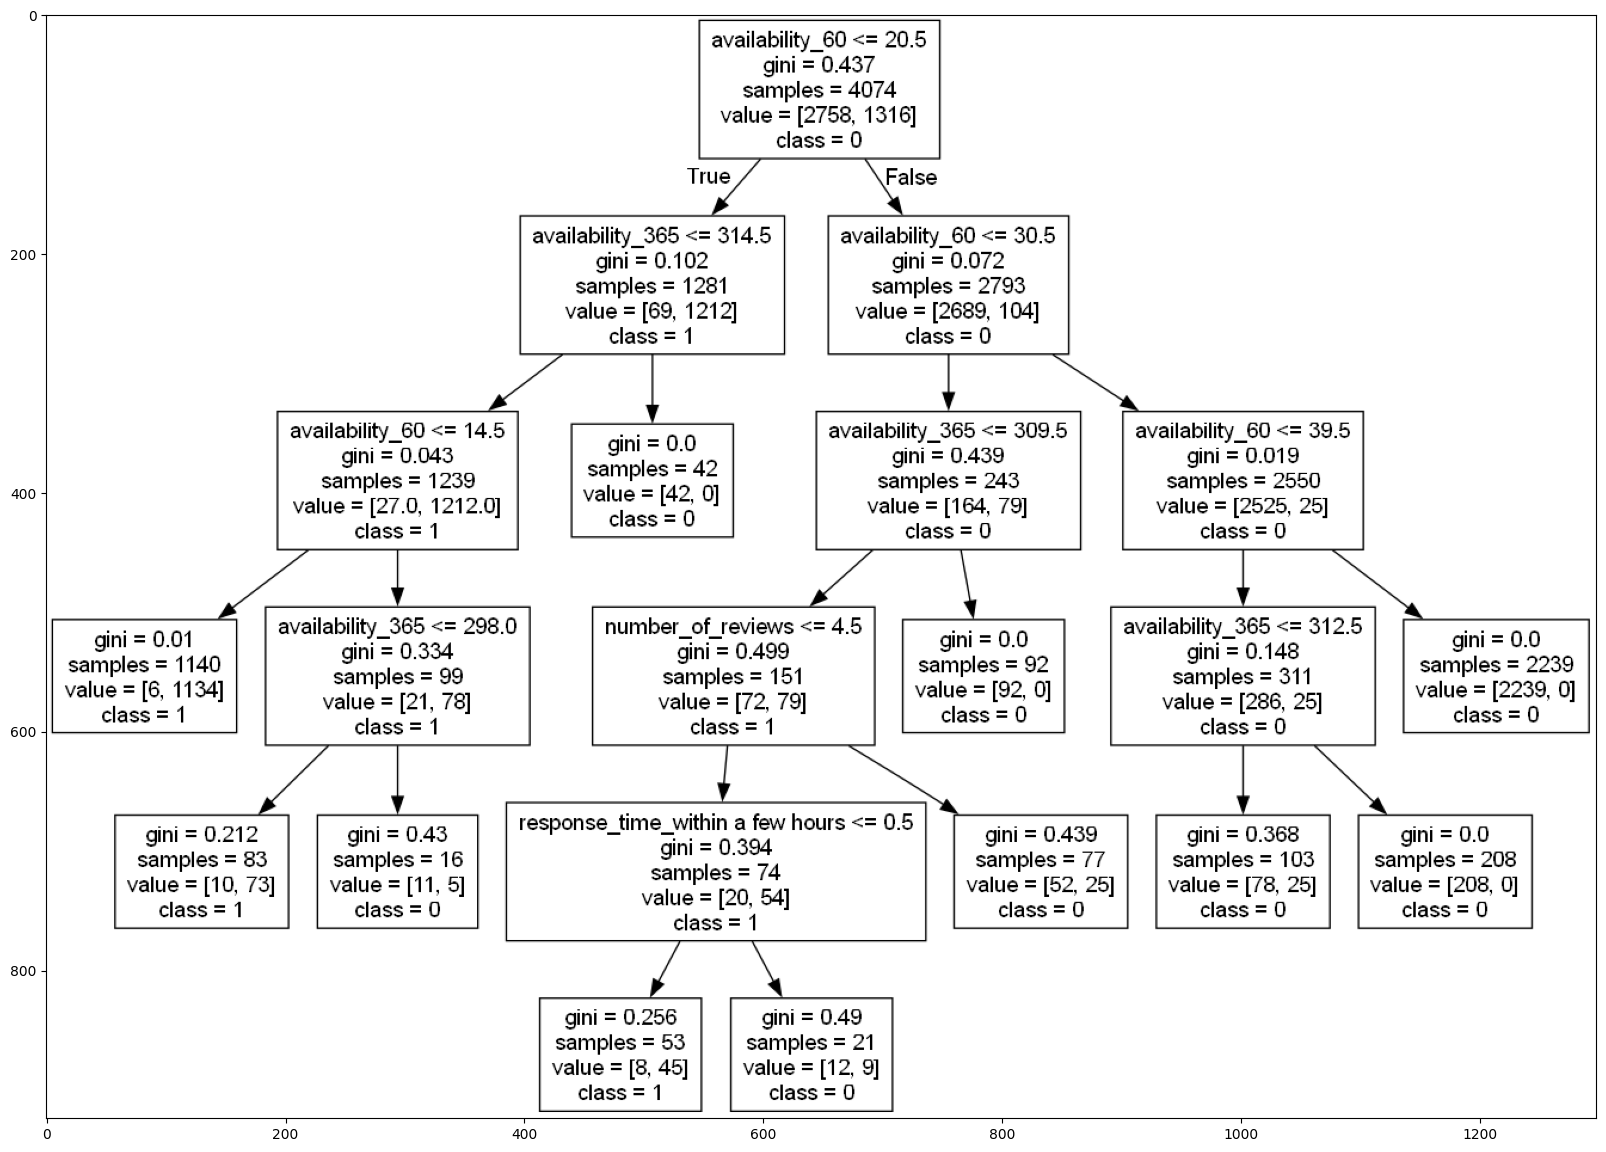

In [18]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [19]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)



In [20]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.7457
Precision: 0.6733
Recall.  : 0.4134

 -- test set -- 
Accuracy : 0.7199
Precision: 0.5783
Recall.  : 0.3732


In [21]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[2494  772]
 [ 264  544]]
[[1054  341]
 [ 148  203]]


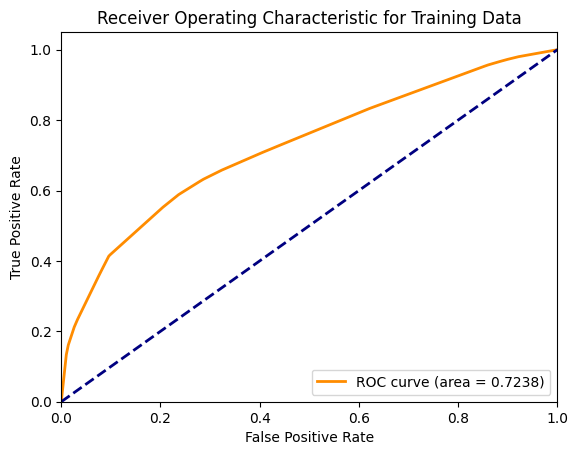

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train[:, 1])
roc_auc = roc_auc_score(y_train, y_prob_train[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()


In [23]:
# Check the first few rows of df
print(df.head())


   host_response_rate  host_is_superhost  host_listings_count  \
0                0.00                  0                  1.0   
1                0.00                  0                  1.0   
2                0.00                  0                  2.0   
3                0.00                  0                  2.0   
4                0.98                  0                301.0   

   host_has_profile_pic  host_identity_verified  accommodates  bathrooms  \
0                     1                       0             6        2.5   
1                     1                       1             2        0.0   
2                     1                       1             2        1.5   
3                     1                       1             2        1.5   
4                     1                       1             6        2.0   

   bedrooms  beds  price  ...  Heating  Internet  Iron  Kitchen  Pool  \
0       1.0   3.0  300.0  ...        1         1     0        1     0   
1     

In [24]:
# Extract feature importances from the trained decision tree
feature_importances = dt.feature_importances_

# Create a DataFrame mapping features to their importance values
df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})


In [25]:
print(df.head())


                  feature  importance
0      host_response_rate    0.312168
1       host_is_superhost    0.000000
2     host_listings_count    0.036153
3    host_has_profile_pic    0.000000
4  host_identity_verified    0.000000


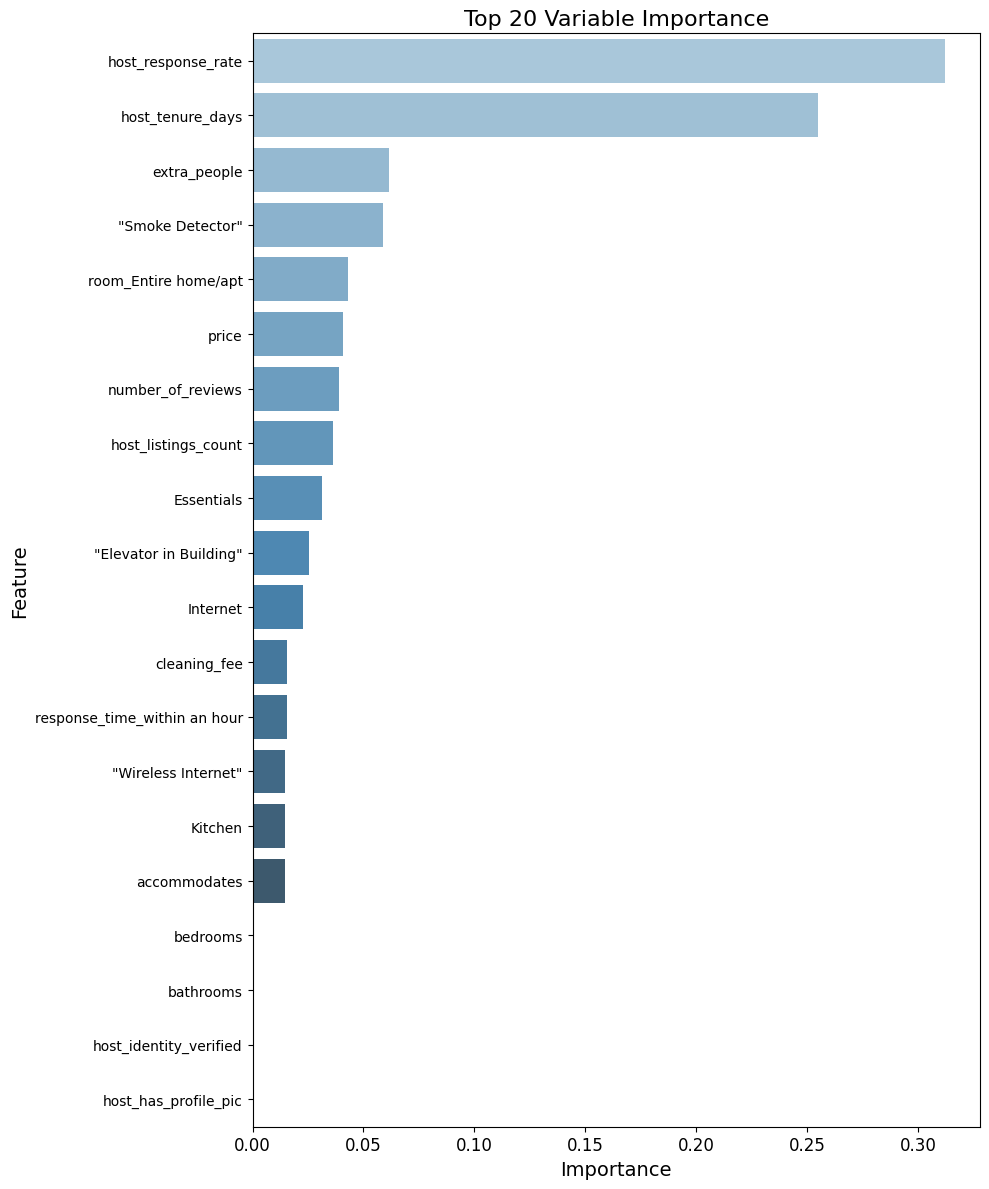

In [26]:
# Sort the features by importance
df2 = df.sort_values(by=['importance'], ascending=False)

# Limit to the top 20 most important features
top_n = 20
df2_top = df2.head(top_n)

# Plot the top features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 12))
sns.barplot(data=df2_top, y='feature', x='importance', palette='Blues_d')
plt.title('Top 20 Variable Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
